# Trabalho Final

In [1]:
# Importação das libs necessárias
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import csv


## Carga e tratamento dos dados

In [2]:
# Carrega o dataset
df_lithology = pd.read_csv('datasets/lithology.csv', sep=';')


In [3]:
# Para mostrar todas as colunas
pd.set_option("display.max_columns", None)

df_lithology

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC,FORCE_2020_LITHOFACIES_LITHOLOGY,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,-999.0,1.611410,1.798681,1.884186,80.200851,-999.0,20.915468,161.131180,24.612379,17.5,34.636410,1.980835,-0.574928,-999.0,-999.0,65000.0,24.735691,0.314847,0.150172,-0.000000,-0.000000,-0.000000,0.000,0.000000,6,68
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,-999.0,1.618070,1.795641,1.889794,79.262886,-999.0,19.383013,160.603470,23.895531,17.5,34.636410,1.968800,-0.570188,-999.0,-999.0,65000.0,24.492376,0.318528,0.148269,0.527710,-0.005608,0.937965,0.152,-0.243315,6,68
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,-999.0,1.626459,1.800733,1.896523,74.821999,-999.0,22.591518,160.173615,23.916357,17.5,34.779556,1.968800,-0.574245,-999.0,-999.0,65000.0,24.202299,0.322946,0.139258,0.429855,-0.006729,4.440887,0.152,-0.290077,6,68
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,-999.0,1.621594,1.801517,1.891913,72.878922,-999.0,32.191910,160.149429,23.793688,17.5,39.965164,1.959282,-0.586315,-999.0,-999.0,65000.0,24.400797,0.319919,0.135315,0.024185,0.004610,1.943077,0.152,0.198498,6,68
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,-999.0,1.602679,1.795299,1.880034,71.729141,-999.0,38.495632,160.128342,24.104078,17.5,57.483765,1.953100,-0.597914,-999.0,-999.0,65000.0,24.916765,0.312121,0.132982,0.021088,0.011879,1.149780,0.152,0.515968,6,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,444920.37500,6421578.0,-999.000000,8.423170,-999.0,-999.000000,-999.000000,2.527984,77.654900,-999.0,4.586425,68.519517,-999.000000,8.5,27.674368,-0.076830,-0.001763,-999.0,-999.0,30000.0,3.853715,0.906928,0.188539,5.709644,-0.050081,-15.087708,0.152,-1.235199,11,7
1170507,3169.4644,444920.37500,6421578.0,-999.000000,8.379244,-999.0,-999.000000,-999.000000,2.537613,75.363937,-999.0,7.019858,67.485402,-999.000000,8.5,28.024338,-0.120756,-0.007600,-999.0,-999.0,65030.0,3.621808,0.924426,0.181304,1.034114,-0.009629,2.290962,0.152,-0.231906,11,7
1170508,3169.6164,444920.37500,6421578.0,-999.000000,8.350248,-999.0,-999.000000,-999.000000,2.491860,66.452843,-999.0,9.049782,72.579981,-999.000000,8.5,28.091282,-0.149752,-0.018297,-999.0,-999.0,65030.0,4.739676,0.841284,0.153161,-5.094579,0.045753,8.911095,0.152,1.117868,11,7
1170509,3169.7684,444920.37500,6421578.0,-999.000000,8.313779,-999.0,-999.000000,-999.000000,2.447539,55.784817,-999.0,8.903917,77.981748,-999.000000,8.5,28.019775,-0.186221,-0.011438,-999.0,-999.0,65030.0,5.862411,0.760743,0.119469,-5.401767,0.044321,10.668026,0.152,1.122734,11,7


In [4]:
# Lista de colunas existentes
df_lithology.info()

# Selecionando as features
category_columns = ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   DEPTH_MD                          1170511 non-null  float64
 1   X_LOC                             1170511 non-null  float64
 2   Y_LOC                             1170511 non-null  float64
 3   Z_LOC                             1170511 non-null  float64
 4   CALI                              1170511 non-null  float64
 5   RSHA                              1170511 non-null  float64
 6   RMED                              1170511 non-null  float64
 7   RDEP                              1170511 non-null  float64
 8   RHOB                              1170511 non-null  float64
 9   GR                                1170511 non-null  float64
 10  NPHI                              1170511 non-null  float64
 11  PEF                               117

In [5]:
# Descrevendo os dados
df_lithology.describe().round(decimals=1)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC,FORCE_2020_LITHOFACIES_LITHOLOGY,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
count,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0
mean,2184.1,485629.2,6679844.6,-2128.0,-62.8,-455.0,-28.5,1.2,-135.7,70.9,-345.5,-422.1,78.4,-217.2,11.9,-479.5,-87.3,-161.2,-728.8,-847.5,61386.0,-127.9,-137.2,0.3,-33.0,-137.7,-0.0,0.2,-137.7,6.6,41.3
std,997.2,34451.7,129079.7,972.6,266.7,508.7,188.0,149.6,345.1,34.2,475.4,497.2,204.5,470.2,3.1,1184.8,284.2,367.5,444.1,361.7,13891.7,348.3,344.5,0.2,178.7,344.4,3.5,0.3,344.4,3.1,22.8
min,136.1,426898.8,6406641.0,-5395.6,-999.0,-999.0,-999.0,-999.0,-999.0,0.1,-999.0,-999.0,-999.0,-999.0,6.0,-999.0,-999.0,-999.0,-999.0,-999.0,30000.0,-999.0,-999.0,0.0,-999.0,-999.0,-268.5,0.0,-999.0,0.0,-1.0
25%,1418.6,454801.8,6591139.8,-2804.6,8.9,-999.0,0.9,0.9,2.0,47.6,-999.0,-999.0,85.3,-999.0,8.5,-999.0,-0.1,-0.0,-999.0,-999.0,65000.0,2.9,0.4,0.1,-0.7,-0.0,-1.4,0.2,-0.5,5.0,24.0
50%,2076.6,476907.8,6732205.0,-2030.5,12.4,0.6,1.4,1.4,2.2,68.4,0.2,2.9,106.9,40.4,12.2,-999.0,0.4,-0.0,-999.0,-999.0,65000.0,7.7,0.5,0.2,-0.0,-0.0,-0.0,0.2,-0.1,6.0,39.0
75%,2864.4,520153.2,6784877.5,-1373.3,15.7,1.5,2.6,2.5,2.5,89.0,0.4,4.6,140.1,70.4,12.2,15.0,1.7,0.0,0.1,-999.0,65000.0,15.5,0.7,0.4,0.6,0.0,1.4,0.2,0.2,9.0,66.0
max,5436.6,572632.8,6856661.0,-111.1,28.3,2193.9,1988.6,1999.9,3.5,1077.0,1.0,383.1,1555.3,526.5,26.0,47015.1,8.0,1.5,185.7,10000.0,99000.0,157.0,1.0,1.0,759.6,1.1,266.5,269.3,110.7,13.0,69.0


Identificado que muitas colunas possuem valores -999 como mínimo. É evidente que são valores ausentes. Pela falta de conhecimento sobre os termos e comportamento adequado, é muito difícil identificar como substituir esses valores. Inicialmente vamos deixar a rede se virar.
Me incomoda um pouco o fato de que o RMIC possui mais que 75% do valores ausentes.

In [6]:
# Isso aqui trava o jupyter - Então não precisa pois temos as infos necessárias no describe acima. Faltando só os outliers.
#for column in df_lithology.columns:
#    df_lithology[column].plot.box()
#    plt.show()

# Mas vamos aproveitar e identificar qual o volume de registros ausentes nas colunas:
absent_data = []
for column in df_lithology.columns:
    qtd = len(df_lithology[df_lithology[column] == -999])
    absent_data.append([column, qtd, round((qtd / len(df_lithology)),2)])

pd.DataFrame(absent_data, columns=['column', 'absent', 'ratio']).sort_values('ratio', ascending=False)


,column,absent,ratio
19,RMIC,994351,0.85
18,MUDWEIGHT,854360,0.73
15,ROP,635440,0.54
5,RSHA,539861,0.46
11,PEF,498819,0.43
10,NPHI,405102,0.35
13,SP,306838,0.26
17,DRHO,188895,0.16
22,Normalized_RHOB,161269,0.14
21,Carbon_Index,161269,0.14


In [7]:
# Conferindo as opções de cada y
df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000.0    720803
30000.0    168937
65030.0    150455
70000.0     56320
80000.0     33329
99000.0     15245
70032.0     10513
88000.0      8213
90000.0      3820
74000.0      1688
86000.0      1085
93000.0       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

O que podemos notar aqui é uma altíssima concentração no 65000. Vamos analisar como isso vai influenciar a rede:

In [8]:
# Lendo o hidden e checando as colunas
df_hidden = pd.read_csv('datasets/hidden.csv', sep=';')
df_hidden


,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,1518.2800,433906.7500,6460000.5,-1493.241821,15.506232,-999.0,-999.000000,0.878615,-999.0,103.451515,0.439925,-999.0,147.043427,-999.0,17.5,146.526276,-1.993768,0.109706,-999.0,-999.000000,-999.0,-999.0,0.229715,-0.000000,-999.0,-0.000000,0.000,-999.0,5,51
1,1518.4320,433906.7500,6460000.5,-1493.393799,18.524611,-999.0,-999.000000,0.874237,-999.0,94.124893,0.504055,-999.0,145.426468,-999.0,17.5,147.605148,1.024611,-0.006418,-999.0,-999.000000,-999.0,-999.0,0.206369,1.616959,-999.0,9.326622,0.152,-999.0,5,51
2,1518.5840,433906.7500,6460000.5,-1493.545776,18.855669,-999.0,-999.000000,0.869858,-999.0,93.586487,0.512960,-999.0,145.295105,-999.0,17.5,140.783127,1.355669,0.022769,-999.0,-999.000000,-999.0,-999.0,0.205021,0.131363,-999.0,0.538406,0.152,-999.0,5,51
3,1518.7360,433906.7500,6460000.5,-1493.697754,19.163353,-999.0,-999.000000,0.865479,-999.0,91.113373,0.500070,-999.0,143.657593,-999.0,17.5,125.159531,1.663353,0.024972,-999.0,-999.000000,-999.0,-999.0,0.198831,1.637512,-999.0,2.473114,0.152,-999.0,5,51
4,1518.8880,433906.7500,6460000.5,-1493.849609,18.489744,-999.0,0.849849,0.863804,-999.0,100.228333,0.277670,-999.0,142.838440,-999.0,17.5,107.576691,0.989744,0.024527,-999.0,-999.000000,-999.0,-999.0,0.221647,0.819153,-999.0,-9.114960,0.152,-999.0,5,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122392,2973.2988,536096.0625,6793022.0,-2943.444580,8.276272,-999.0,2.820439,3.158570,-999.0,90.720284,-999.000000,-999.0,75.260658,-999.0,8.5,15.195305,-0.223728,0.502458,-999.0,2.311106,-999.0,-999.0,0.455601,0.591225,-999.0,1.536675,0.152,-999.0,0,16
122393,2973.4508,536096.0625,6793022.0,-2943.595947,8.267273,-999.0,3.020778,3.332977,-999.0,87.062027,-999.000000,-999.0,74.868301,-999.0,8.5,15.770223,-0.232727,0.374753,-999.0,1.853418,-999.0,-999.0,0.436064,0.392357,-999.0,3.658257,0.152,-999.0,0,16
122394,2973.6028,536096.0625,6793022.0,-2943.747559,8.250099,-999.0,2.795711,3.044179,-999.0,86.115921,-999.000000,-999.0,74.848122,-999.0,8.5,16.418465,-0.249901,0.211487,-999.0,1.325961,-999.0,-999.0,0.431012,0.020180,-999.0,0.946106,0.152,-999.0,0,16
122395,2973.7548,536096.0625,6793022.0,-2943.899170,-999.000000,-999.0,2.658694,2.847681,-999.0,89.497131,-999.000000,-999.0,74.964027,-999.0,8.5,17.037945,-999.000000,0.147950,-999.0,1.260347,-999.0,-999.0,0.449069,-0.115906,-999.0,-3.381210,0.152,-999.0,0,16


In [9]:
# Monta classes para a rede com o índice
lithofacies = {
    30000: 'Sandstone',
    65030: 'Sandstone/Shale',
    65000: 'Shale',
    80000: 'Marl',
    74000: 'Dolomite',
    70000: 'Limestone',
    70032: 'Chalk',
    88000: 'Halite',
    86000: 'Anhydrite',
    99000: 'Tuff',
    90000: 'Coal',
    93000: 'Basement'
}
lithofacies

lithofacies_keys = list(lithofacies.keys())

df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY_IDX'] = df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: lithofacies_keys.index(x))


In [10]:
# Usando exemplos de https://towardsdatascience.com/deep-learning-on-dataframes-with-pytorch-66b21be54ef6
#                    https://medium.com/swlh/my-first-work-with-pytorch-eea3bc82068
#                    https://visualstudiomagazine.com/articles/2020/12/15/pytorch-network.aspx

# Random state fixo para reproduzir o mesmo cenário
random_state = 42

def separate_datasets(X_y = df_lithology, categories = category_columns, resample = None):
    X_ = X_y[categories].values
    y_ = X_y['FORCE_2020_LITHOFACIES_LITHOLOGY_IDX'].values

    if resample:
        X, y = resample(X_, y_, random_state)
    else:
        X, y = X_, y_

    # Quebra o dataset em teste e treino
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Random state ensures that the splits that you generate are reproducible. 
    # Scikit-learn uses random permutations to generate the splits. 
    # The random state that you provide is used as a seed to the random number generator.
    # This ensures that the random numbers are generated in the same order.
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)

    return (X_train, X_test, y_train, y_test)

(X_train, X_test, y_train, y_test) = separate_datasets()


In [11]:
# Verificação de como foi dividido o dataset com base nas classes (a preocupação aqui era que não tivesse reservando casos suficientes para as classes com menos amostras).

# Teste para verificar se o comportamento da rede era o mesmo tirando a classe com maior número de amostras
#separate_datasets(df_lithology[df_lithology.FORCE_2020_LITHOFACIES_LITHOLOGY != 65000])

# Função que mostra o índice da amostra e a taxa de valores selecionados para amostra de teste e treino
def print_sample_test_ratio(y_te = y_test, y_tr = y_train):
    test_data = pd.DataFrame(y_te).value_counts()
    train_data = pd.DataFrame(y_tr).value_counts()

    full_data = pd.concat([test_data, train_data], axis=1)
    full_data['ratio'] = full_data.apply(lambda row : row[0] / row[1], axis=1)
    return full_data

print_sample_test_ratio()

,0,1,ratio
0,,,
2,143768,577035,0.249150
0,33968,134969,0.251673
1,30246,120209,0.251612
5,11150,45170,0.246845
3,6737,26592,0.253347
9,3056,12189,0.250718
6,2146,8367,0.256484
7,1680,6533,0.257156
10,756,3064,0.246736


In [12]:
# Função padrão para treinar o modelo
def train_model(model_class, epochs = 100, learning_rate = 0.01, plot = 1, X_train = X_train, y_train = y_train):

    # Inicializa o modelo da classe passada
    model = model_class()

    criterion = nn.CrossEntropyLoss()

    # Otimizador Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Otimizador SGD
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    loss_arr = []

    for i in range(epochs):
        y_hat = model.forward(X_train)
        loss = criterion(y_hat, y_train)
        loss_arr.append(float(loss))
        
    
        if i % 10 == 0:
            print(f'Epoch: {i} Loss: {loss}')
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Modo de predição
    model.eval()

    if plot:
        plt.title('Loss VS Epoch')
        plt.xlabel("Loss")
        plt.xlabel("Epoch")
        plt.plot(range(epochs), loss_arr)

    return model


Epoch: 0 Loss: 330264.09375
Epoch: 10 Loss: 40661.12109375
Epoch: 20 Loss: 14693.759765625
Epoch: 30 Loss: 2.514774799346924
Epoch: 40 Loss: 2.4585883617401123
Epoch: 50 Loss: 2.3774263858795166
Epoch: 60 Loss: 2.291567325592041
Epoch: 70 Loss: 2.2072551250457764
Epoch: 80 Loss: 2.126608371734619
Epoch: 90 Loss: 2.050394058227539


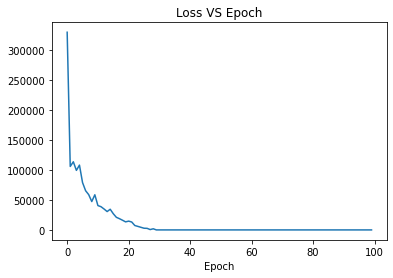

In [13]:
# Criando nossa rede neural 

# v1 - Exemplo simples para teste
class ANN_v1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(category_columns), out_features=20)
        self.fc2 = nn.Linear(in_features=20, out_features=16)
        self.output = nn.Linear(in_features=16, out_features=len(lithofacies))
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando
model_v1 = train_model(ANN_v1)


In [14]:
# Função para mostrar a acurácia do modelo
def print_accuracy(model, X_tr = X_train, y_tr = y_train, X_te = X_test, y_te = y_test):
    # Print accuracy
    predictions = torch.argmax(model(X_tr), dim=1)
    print('Train accuracy: ', (y_tr == predictions).sum() / len(predictions), '- únicos:', predictions.unique())
    
    predictions = torch.argmax(model(X_te), dim=1)
    print('Test accuracy: ', (y_te == predictions).sum() / len(predictions), '- únicos:', predictions.unique())

# Função para gerar o arquivo do resposta para o professor. 
def output_hidden_prediction(model, columns = category_columns):
    hidden_predictions = model(torch.FloatTensor(df_hidden[columns].values))
    with open('datasets/hidden-results-' + type(model).__name__ + '.csv', 'w', newline='\n') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=';')
        spamwriter.writerow(['lithology'])
        spamwriter.writerows([[lithofacies_keys[x]] for x in torch.argmax(hidden_predictions, dim=1)])

print_accuracy(model_v1)
#output_hidden_prediction(model_v1)

Train accuracy:  tensor(0.6162) - únicos: tensor([2])
Test accuracy:  tensor(0.6141) - únicos: tensor([2])


61% de acurácia é péssimo. Tendo em conta que todas as previsões foram 65000 \[2] e esse y possui 720803 linhas de um todal de 1170511, ou seja, corresponde a 61,5%.

Há algo de errado com nosso modelo ou dados.

# Hipótese 1: Poucos nós. Fazendo com que features impactem demasiado em outras:


Epoch: 0 Loss: 207542.671875
Epoch: 10 Loss: 23182.330078125
Epoch: 20 Loss: 24008.763671875
Epoch: 30 Loss: 16317.1640625
Epoch: 40 Loss: 7955.98095703125
Epoch: 50 Loss: 5053.24609375
Epoch: 60 Loss: 4333.4599609375
Epoch: 70 Loss: 2273.860595703125
Epoch: 80 Loss: 1087.7366943359375
Epoch: 90 Loss: 620.5584106445312


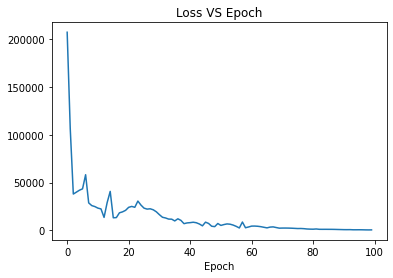

In [15]:
# Aumentando o número de nós pra bater com as categorias
class ANN_v2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(category_columns), out_features=len(category_columns))
        self.fc2 = nn.Linear(in_features=len(category_columns), out_features=len(category_columns))
        self.output = nn.Linear(in_features=len(category_columns), out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando
model_v2 = train_model(ANN_v2)


In [16]:
print_accuracy(model_v2)
#output_hidden_prediction(model_v2)

Train accuracy:  tensor(0.4687) - únicos: tensor([0, 2, 5])
Test accuracy:  tensor(0.4680) - únicos: tensor([0, 2, 5])


Resultado hipótese 1: Baixou demais a mesma acurácia. Porém, já tem mais que uma previsão no resultado.

# Hipótese 2: Será que a localização no solo é suficiente?

Epoch: 0 Loss: 548898.4375
Epoch: 10 Loss: 61602.265625
Epoch: 20 Loss: 96133.390625
Epoch: 30 Loss: 32175.041015625
Epoch: 40 Loss: 26180.62890625
Epoch: 50 Loss: 11380.9716796875
Epoch: 60 Loss: 4830.27587890625
Epoch: 70 Loss: 2419.79638671875
Epoch: 80 Loss: 1729.1856689453125
Epoch: 90 Loss: 2.320835590362549


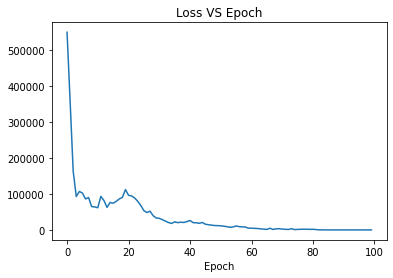

In [19]:
#Será que usando somente a posição no solo, muda algo?

test_columns = ['X_LOC', 'Y_LOC', 'Z_LOC']

class ANN_v3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(test_columns), out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=20)
        self.output = nn.Linear(in_features=20, out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando

(X_train_2, X_test_2, y_train_2, y_test_2) = separate_datasets(categories=test_columns)
model_v3 = train_model(ANN_v3, X_train=X_train_2, y_train=y_train_2)

In [20]:
#output_hidden_prediction(model_v3, test_columns)
print_accuracy(model_v3, X_tr=X_train_2, y_tr=y_train_2, X_te=X_test_2, y_te=y_test_2)

Train accuracy:  tensor(0.6162) - únicos: tensor([2])
Test accuracy:  tensor(0.6141) - únicos: tensor([2])


Só as colunas de posição não deram uma acurária boa. Seguimos.

# Hipótese 3: Apenas dados com mais que 10% de dados presentes


In [ ]:
hyp2_columns = ['DCAL', 'CALI', 'Delta_DTC', 'RMED', 'DTC', 'RDEP', 'Z_LOC', 'GROUP_encoded', 'Delta_DEPTH_MD', 'Delta_GR', 'FORMATION_encoded', 
    'DEPTH_MD', 'Normalized_GR', 'X_LOC', 'BS', 'GR', 'Y_LOC']

class ANN_v4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(hyp2_columns), out_features=len(hyp2_columns))
        self.fc2 = nn.Linear(in_features=len(hyp2_columns), out_features=len(hyp2_columns))
        self.output = nn.Linear(in_features=len(hyp2_columns), out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando
(X_train_3, X_test_3, y_train_3, y_test_3) = separate_datasets(categories=hyp2_columns)

# Teste com mais épocas pq atingiu um ótimo local
model_v4 = train_model(ANN_v4, X_train=X_train_3, y_train=y_train_3, epochs=200)


In [ ]:
#output_hidden_prediction(model_v4, hyp2_columns)
print_accuracy(model_v4, X_tr=X_train_3, y_tr=y_train_3, X_te=X_test_3, y_te=y_test_3)

Curioso, apenas com as colunas com poucos dados ausentes deu a mesma acurácia da solução original. Vamos pra próxima.

# Hipótese 3: Apenas colunas quem não tem dados ausentes.

In [ ]:
hyp3_columns = ['GROUP_encoded', 'Delta_DEPTH_MD', 'Delta_GR', 'FORMATION_encoded', 
    'DEPTH_MD', 'Normalized_GR', 'X_LOC', 'BS', 'GR', 'Y_LOC']

class ANN_v5(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(hyp3_columns), out_features=len(hyp3_columns))
        self.fc2 = nn.Linear(in_features=len(hyp3_columns), out_features=len(hyp3_columns))
        self.output = nn.Linear(in_features=len(hyp3_columns), out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando

(X_train_4, X_test_4, y_train_4, y_test_4) = separate_datasets(categories=hyp3_columns)

# Teste com mais épocas pq atingiu um ótimo local
model_v5 = train_model(ANN_v5, X_train=X_train_4, y_train=y_train_4, epochs=200)


In [ ]:
#output_hidden_prediction(model_v5, hyp3_columns)
print_accuracy(model_v5, X_tr=X_train_4, y_tr=y_train_4, X_te=X_test_4, y_te=y_test_4)

Não melhorou. Continua 61%.

# Hipótese 4: Ainda mais neurônios!

Por termos valores "nulos" como -999, alguns neurônios pode estar ficando viciados.
Pra atenuar os caminhos viciados. Adicionamos um dropout.

In [ ]:
# Na casa das centenas de nós. 10 a 20 a mais que o de features.
class ANN_v6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(category_columns), out_features=len(category_columns)*20)
        self.fc2 = nn.Linear(in_features=len(category_columns)*20, out_features=len(category_columns)*10)
        self.fc3 = nn.Linear(in_features=len(category_columns)*10, out_features=len(category_columns))
        self.output = nn.Linear(in_features=len(category_columns), out_features=len(lithofacies))
        self.dropout = nn.Dropout(0.25)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.output(x)
        
        return x

# Treinando
model_v6 = train_model(ANN_v6)


In [ ]:
#output_hidden_prediction(model_v6)
print_accuracy(model_v6)

Tbm não mudou acurácia. :-(

# Hipótese 5: Undersampling - Balancear o dataset em quantidade de amostras equivalentes por classe.
A concentração do 65000 parece realmente "enganar a rede". Vamos tentar equilibrar o treino.

In [ ]:
class ANN_v7(ANN_v2):
    pass

# Faz o undersample para diminuir a proeminência de algumas classes na amostra
def undersampling(X_, y_, random_state):
    from imblearn.under_sampling import NearMiss
    undersample = NearMiss(version=1, n_neighbors=3)
    return undersample.fit_resample(X_, y_)

# Treinando
(X_train_7, X_test_7, y_train_7, y_test_7) = separate_datasets(resample=undersampling)
model_v7 = train_model(ANN_v7, X_train=X_train_7, y_train=y_train_7)

In [ ]:
#output_hidden_prediction(model_v7)
print_accuracy(model_v7, X_tr=X_train_7, y_tr=y_train_7, X_te=X_test_7, y_te=y_test_7)
print_sample_test_ratio(y_te=y_test_7, y_tr=y_train_7)


Acurácia de 8%. Péssimo.

# Hipótese 6: Apenas linhas sem dados ausentes (-999)

In [ ]:
class ANN_v8(ANN_v2):
    pass

# Preparando o dataset
X_y_just_present = df_lithology[(df_lithology.RMIC != -999) &
    (df_lithology.MUDWEIGHT != -999) &
    (df_lithology.ROP != -999) &
    (df_lithology.RSHA != -999) &
    (df_lithology.PEF != -999) &
    (df_lithology.NPHI != -999) &
    (df_lithology.SP != -999) &
    (df_lithology.DRHO != -999) &
    (df_lithology.Normalized_RHOB != -999) &
    (df_lithology.Carbon_Index != -999) &
    (df_lithology.RHOB != -999) &
    (df_lithology.Delta_Carbon_Index != -999) &
    (df_lithology.Delta_RHOB != -999) &
    (df_lithology.DCAL != -999) &
    (df_lithology.CALI != -999) &
    (df_lithology.RMED != -999) &
    (df_lithology.DTC != -999) &
    (df_lithology.Delta_DTC != -999) &
    (df_lithology.Z_LOC != -999) &
    (df_lithology.RDEP != -999)]

# Treinando
(X_train_8, X_test_8, y_train_8, y_test_8) = separate_datasets(X_y_just_present)
model_v8 = train_model(ANN_v8, X_train=X_train_8, y_train=y_train_8)


In [ ]:
#output_hidden_prediction(model_v8)
print_accuracy(model_v8, X_tr=X_train_8, y_tr=y_train_8, X_te=X_test_8, y_te=y_test_8)
print_sample_test_ratio(y_tr=y_train_8, y_te=y_test_8)


Opa!!! Evolução! Retirando todas as linhas com dados vazios, aumentou a acurácia para 73%. 
Mas olhando os dados de dados restantes. Provavelmente só aumentou a acurácia porque aumentou a proeminência da classe 65000.


# Hipótese 7: Oversampling - Gerar mais dados para balancear o dataset

In [ ]:
class ANN_v9(ANN_v2):
    pass

# Faz o undersample para diminuir a proeminência de algumas classes na amostra
def oversampling(X_, y_, random_state):
    from imblearn.over_sampling import SMOTE
    oversample = SMOTE(random_state=random_state)
    return oversample.fit_resample(X_, y_)

# Treinando
(X_train_9, X_test_9, y_train_9, y_test_9) = separate_datasets(resample=oversampling)
model_v9 = train_model(ANN_v9, X_train=X_train_9, y_train=y_train_9)

In [ ]:
#output_hidden_prediction(model_v9)
print_accuracy(model_v9, X_tr=X_train_9, y_tr=y_train_9, X_te=X_test_9, y_te=y_test_9)
print_sample_test_ratio(y_tr=y_train_9, y_te=y_test_9)

A acurácia ficou baixa, em torno de 8%. Curioso que ficou parecido undersampling.

# Hipótese 8: Reconstruir dados ausentes



In [ ]:
cols_with_NAs = ['RMIC','MUDWEIGHT','ROP','RSHA','PEF','NPHI','SP','DRHO',
    'Normalized_RHOB','Carbon_Index','RHOB','Delta_Carbon_Index','Delta_RHOB',
    'DCAL','CALI','RMED','DTC','Delta_DTC','Z_LOC','RDEP']

df_lithology_clean = df_lithology.replace(-999.0, np.nan)

#Mediana pode ser melhor que a média pois são valores existentes no modelo
cols_values = df_lithology_clean.groupby('FORCE_2020_LITHOFACIES_LITHOLOGY_IDX').median()
#print(cols_values)
#print(df_lithology_clean.describe())

for index, values in cols_values.iterrows():
    for col_with_NA in cols_with_NAs:
        df_lithology_clean.loc[df_lithology_clean.FORCE_2020_LITHOFACIES_LITHOLOGY_IDX == index] = \
            df_lithology_clean.loc[df_lithology_clean.FORCE_2020_LITHOFACIES_LITHOLOGY_IDX == index] \
                .fillna(values[col_with_NA] or 0)
    print('Done for', index)

#Teste pois não pode mudar mto a média
#print(df_lithology_clean.describe())

# Checando se a contagem realmente preencheu os valores
#print(df_lithology_clean.info())


Done for 0
Done for 1
Done for 2
Done for 3
Done for 4
Done for 5
Done for 6
Done for 7
Done for 8
Done for 9
Done for 10
Done for 11


Epoch: 0 Loss: 211683.71875
Epoch: 10 Loss: 9153.0693359375
Epoch: 20 Loss: 419.2419128417969
Epoch: 30 Loss: 2.560197114944458
Epoch: 40 Loss: 2.4723994731903076
Epoch: 50 Loss: 2.3776838779449463
Epoch: 60 Loss: 2.2853150367736816
Epoch: 70 Loss: 2.1978187561035156
Epoch: 80 Loss: 2.115727424621582
Epoch: 90 Loss: 2.0390031337738037


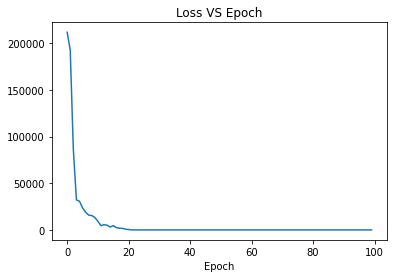

In [ ]:
# Bora treinar com a versão existente mesmo
(X_train_10, X_test_10, y_train_10, y_test_10) = separate_datasets(df_lithology_clean)
model_v10 = train_model(ANN_v2, X_train=X_train_10, y_train=y_train_10)

In [ ]:
#output_hidden_prediction(model_v10)
print_accuracy(model_v10, X_tr=X_train_10, y_tr=y_train_10, X_te=X_test_10, y_te=y_test_10)
print_sample_test_ratio(y_tr=y_train_10, y_te=y_test_10)

Train accuracy:  tensor(0.6162) - únicos: tensor([2])
Test accuracy:  tensor(0.6141) - únicos: tensor([2])


,0,1,ratio
0,,,
2,143768,577035,0.249150
0,33968,134969,0.251673
1,30246,120209,0.251612
5,11150,45170,0.246845
3,6737,26592,0.253347
9,3056,12189,0.250718
6,2146,8367,0.256484
7,1680,6533,0.257156
10,756,3064,0.246736


Não foi. Mesma acurácia. :-(

# Hipótese 9: Verificando correlação.

Epoch: 0 Loss: 6.106042385101318
Epoch: 10 Loss: 1.8093271255493164
Epoch: 20 Loss: 1.4928611516952515
Epoch: 30 Loss: 1.3329087495803833
Epoch: 40 Loss: 1.2669992446899414
Epoch: 50 Loss: 1.2462413311004639
Epoch: 60 Loss: 1.2244648933410645
Epoch: 70 Loss: 1.2019976377487183
Epoch: 80 Loss: 1.1819944381713867
Epoch: 90 Loss: 1.164534091949463


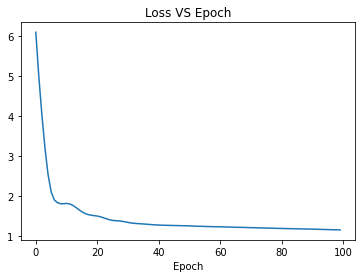

In [ ]:
# Correlação
df_lithology_clean.corr().round(1)


In [ ]:
# Vamos fazer uma simulação só com os campos que têm alguma correlação
#corr_fiels = ['RDEP', 'RHOB', 'GR', 'NPHI', 'DCAL', 'Carbon_Index', 'Normalized_RHOB', 'Normalized_GR', 'GROUP_encoded', 'FORMATION_encoded']

# Notamos que alguns dos campos se repetem e estão normalizados. Mantendo apenas os campos normalizados
corr_fields = ['RDEP', 'NPHI', 'DCAL', 'Carbon_Index', 'Normalized_RHOB', 'Normalized_GR', 'GROUP_encoded', 'FORMATION_encoded']

class ANN_v10(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(corr_fields), out_features=len(corr_fields)*2)
        self.fc2 = nn.Linear(in_features=len(corr_fields)*2, out_features=len(corr_fields))
        self.output = nn.Linear(in_features=len(corr_fields), out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando

(X_train_11, X_test_11, y_train_11, y_test_11) = separate_datasets(df_lithology_clean, categories=corr_fields)

# Teste com mais épocas pq atingiu um ótimo local
model_v11 = train_model(ANN_v10, X_train=X_train_11, y_train=y_train_11)



In [ ]:
#output_hidden_prediction(model_v11, columns=corr_fields)
print_accuracy(model_v11, X_tr=X_train_11, y_tr=y_train_11, X_te=X_test_11, y_te=y_test_11)
print_sample_test_ratio(y_tr=y_train_11, y_te=y_test_11)

Train accuracy:  tensor(0.6193) - únicos: tensor([0, 2, 7])
Test accuracy:  tensor(0.6175) - únicos: tensor([0, 2, 7])


,0,1,ratio
0,,,
2,143768,577035,0.249150
0,33968,134969,0.251673
1,30246,120209,0.251612
5,11150,45170,0.246845
3,6737,26592,0.253347
9,3056,12189,0.250718
6,2146,8367,0.256484
7,1680,6533,0.257156
10,756,3064,0.246736


Opa! Um aumento de 2% na acurácia selecionando campos com correlação. Podemos melhorar isso?

# Hipótese 10: Mais correlação!


Epoch: 0 Loss: 4.518851280212402
Epoch: 10 Loss: 2.057858943939209
Epoch: 20 Loss: 1.5842664241790771
Epoch: 30 Loss: 1.4353464841842651
Epoch: 40 Loss: 1.3824896812438965
Epoch: 50 Loss: 1.354629397392273
Epoch: 60 Loss: 1.3336092233657837
Epoch: 70 Loss: 1.3188375234603882
Epoch: 80 Loss: 1.3074640035629272
Epoch: 90 Loss: 1.2980332374572754


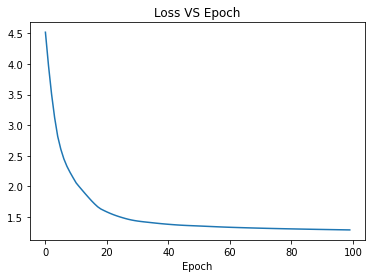

In [ ]:
corr_fields2 = ['RDEP', 'Normalized_GR', 'GROUP_encoded', 'FORMATION_encoded']

df_lithology_clean[corr_fields2 + ['FORCE_2020_LITHOFACIES_LITHOLOGY_IDX']].corr().round(1)

class ANN_v11(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(corr_fields2), out_features=len(corr_fields2)*2)
        self.fc2 = nn.Linear(in_features=len(corr_fields2)*2, out_features=len(corr_fields2))
        self.output = nn.Linear(in_features=len(corr_fields2), out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando

(X_train_12, X_test_12, y_train_12, y_test_12) = separate_datasets(df_lithology_clean, categories=corr_fields2)

# Teste com mais épocas pq atingiu um ótimo local
model_v12 = train_model(ANN_v11, X_train=X_train_12, y_train=y_train_12)



In [ ]:
#output_hidden_prediction(model_v11, columns=corr_fields)
print_accuracy(model_v12, X_tr=X_train_12, y_tr=y_train_12, X_te=X_test_12, y_te=y_test_12)
print_sample_test_ratio(y_tr=y_train_12, y_te=y_test_12)

Train accuracy:  tensor(0.6162) - únicos: tensor([2])
Test accuracy:  tensor(0.6141) - únicos: tensor([2])


,0,1,ratio
0,,,
2,143768,577035,0.249150
0,33968,134969,0.251673
1,30246,120209,0.251612
5,11150,45170,0.246845
3,6737,26592,0.253347
9,3056,12189,0.250718
6,2146,8367,0.256484
7,1680,6533,0.257156
10,756,3064,0.246736


# Hipótese 11: Normalização dos dados.
